In [1]:
import argparse
import random
import numpy as np
import time
import sys
import json
import os
from datetime import datetime
from tqdm import tqdm
from auxiliary_functions import read_file, sum_list_of_int, print_json
from population import get_forward_population_gender_based_monoamorous_couples
from genealogical_ancestors import get_genealogical_ancestors
from genetic_ancestors import get_genetic_ancestors
from genealogical_descendants import get_genealogical_descendants
from genetic_descentants import get_genetic_descendants
from ibd_analysis import calculate_ibd_proportion

In [2]:
seed_n = 395
random.seed(seed_n)
np.random.seed(seed_n)
chrom_lengths = read_file("./chrom_length.txt")

data = {
        'pop_size':200,
        'num_gen': 100,
        'recomb_rate': 1e-8,
        'seed': seed_n,
        'chrom_lengths': chrom_lengths,
        'seq_len': sum_list_of_int(chrom_lengths),
        'kappa_parameter': 0,
    }

In [3]:
forward_pop,mom_time_list_per_gen, mom_time_list_per_gen_count, average_mom_time_all = get_forward_population_gender_based_monoamorous_couples(data['pop_size'], data['num_gen'], chrom_lengths, data['recomb_rate'], data['kappa_parameter'])

[DEBUG] Mother ID: -1, Selected Father: 177
[DEBUG] Mother ID: -1, Selected Father: 187
[DEBUG] Mother ID: -1, Selected Father: 133
[DEBUG] Mother ID: -1, Selected Father: 199
[DEBUG] Mother ID: -1, Selected Father: 171
[DEBUG] Mother ID: -1, Selected Father: 116
[DEBUG] Mother ID: -1, Selected Father: 140
[DEBUG] Mother ID: -1, Selected Father: 102
[DEBUG] Mother ID: -1, Selected Father: 183
[DEBUG] Mother ID: -1, Selected Father: 113
[DEBUG] Mother ID: -1, Selected Father: 189
[DEBUG] Mother ID: -1, Selected Father: 111
[DEBUG] Mother ID: -1, Selected Father: 193
[DEBUG] Mother ID: -1, Selected Father: 137
[DEBUG] Mother ID: -1, Selected Father: 197
[DEBUG] Mother ID: -1, Selected Father: 156
[DEBUG] Mother ID: -1, Selected Father: 120
[DEBUG] Mother ID: -1, Selected Father: 128
[DEBUG] Mother ID: -1, Selected Father: 168
[DEBUG] Mother ID: -1, Selected Father: 179
[DEBUG] Mother ID: -1, Selected Father: 126
[DEBUG] Mother ID: -1, Selected Father: 122
[DEBUG] Mother ID: -1, Selected 

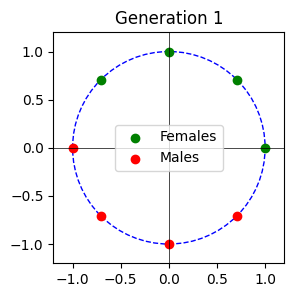

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def draw_circle(list_of_rads, generation):
    # Convert to Cartesian coordinates
    x = np.cos(list_of_rads)
    y = np.sin(list_of_rads)

    # Split the points into two halves
    half_len = len(list_of_rads) // 2
    first_half_rads = list_of_rads[:half_len]
    second_half_rads = list_of_rads[half_len:]

    # Convert both halves to Cartesian coordinates
    x_first_half = np.cos(first_half_rads)
    y_first_half = np.sin(first_half_rads)

    x_second_half = np.cos(second_half_rads)
    y_second_half = np.sin(second_half_rads)

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(3,3))

    # Draw the circle
    circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='dashed')
    ax.add_patch(circle)

    # Plot the first half points in green
    ax.scatter(x_first_half, y_first_half, color='green', label="Females")

    # Plot the second half points in red
    ax.scatter(x_second_half, y_second_half, color='red', label="Males")

    # Formatting the plot
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_aspect('equal')  # Keep the circle aspect ratio
    ax.legend()
    plt.title(f"Generation {generation}")

    # Show the plot
    plt.show()

# Example usage
rads = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
generation_number = 1 
draw_circle(rads, generation_number)


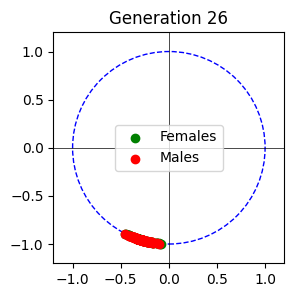

In [31]:
# Assuming 'forward_pop' is a list of populations for different generations,
# and 'generation_number' is the index of the generation you are accessing
generation_number = 25  # or any specific generation index you are working with
draw_circle([i.location for i in forward_pop[generation_number]], generation_number + 1)
